In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Data/Test.csv")

In [3]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 11)

In [5]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [7]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df.describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,418,418,91,418
unique,2,363,76,3
top,male,PC 17608,B57 B59 B63 B66,S
freq,266,5,3,270


In [9]:
df.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<AxesSubplot:>

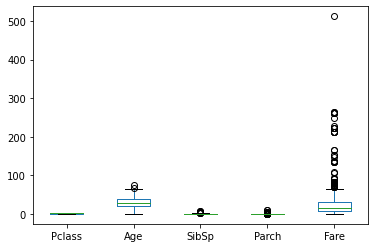

In [10]:
df.plot.box()

<AxesSubplot:>

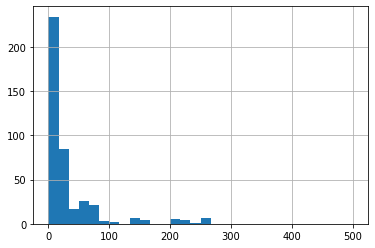

In [11]:
df['Fare'].hist(bins=30, range=(0, 500))

<AxesSubplot:>

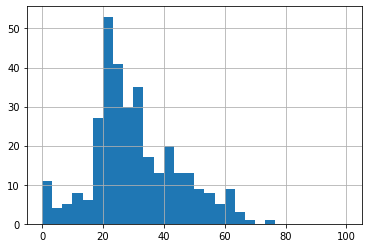

In [12]:
df['Age'].hist(bins=30, range=(0, 100))

In [13]:
def graph_outliers(column_names):
    for column_name in column_names:
        plt.figure(figsize=(3,6))
        sns.boxplot(y=df[column_name])

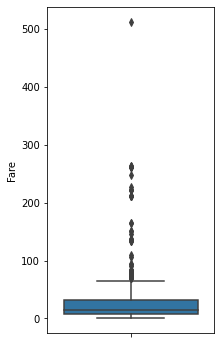

In [14]:
graph_outliers(['Fare'])

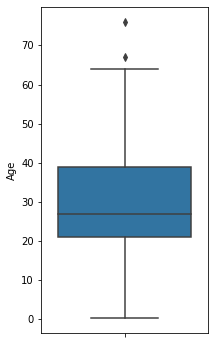

In [15]:
graph_outliers(['Age'])

c:\users\zebas\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

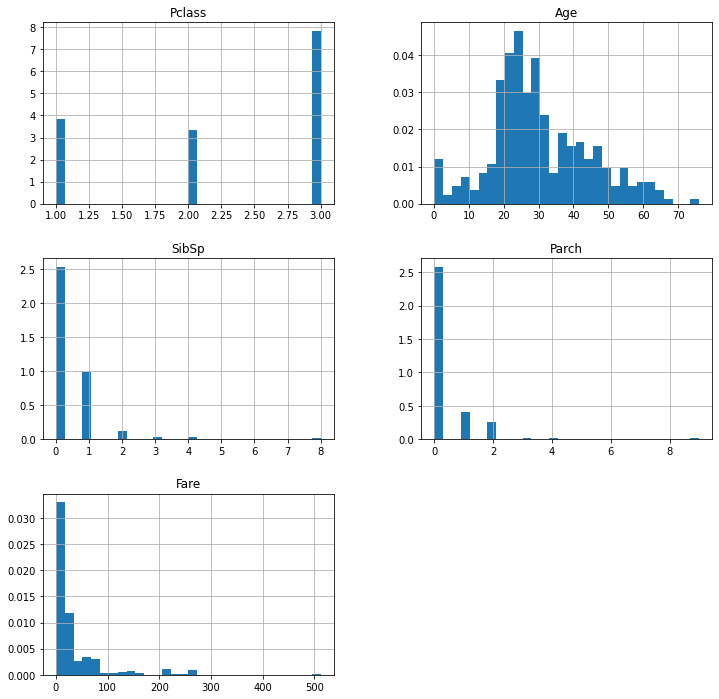

In [16]:
df.hist(bins=30, figsize=(12,12), density=True)

In [17]:
df.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,-0.577147,0.337932,0.171539,0.230046,1.000000


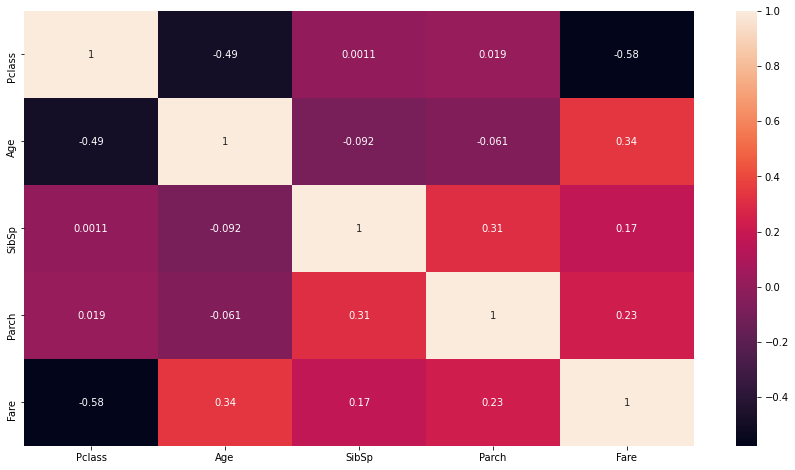

In [18]:
corr = df.corr()
plt.figure(figsize=(15,8))

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

corr

In [19]:
df['Age_group'] = df['Age'].apply(
    lambda x: '[0, 20)' if x < 20 else '[20, 40)' if x < 40 \
        else '[40, 60)' if x < 60  \
        else '[60+)'
)

In [20]:
df['Fare_group'] = df['Fare'].apply(
    lambda x: '[0, 7.9)' if x < 7.9 else '[7.9, 14.4)' if x < 14.4 \
        else '[31, 38.9)' if x < 38.9  \
        else '[38.9+)' if x >= 38.9 \
        else np.nan
)

In [21]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,"[20, 40)","[0, 7.9)"
1,3,female,47.0,1,0,363272,7.0000,NaN,S,"[40, 60)","[0, 7.9)"
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,[60+),"[7.9, 14.4)"
3,3,male,27.0,0,0,315154,8.6625,NaN,S,"[20, 40)","[7.9, 14.4)"
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,"[20, 40)","[7.9, 14.4)"


In [22]:
df.to_csv('Data/TestDataAnalysis.csv', index=False)